fs = 1000

f_1 = 4 Hz

f_2 = 4.5 Hz

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from scipy import signal
import scipy.integrate as integrate

def createSubplot(n):
    fig,ax = plt.subplots(n,figsize=(10,10))
    fig.tight_layout(pad=3.0)
    return fig,ax

def calFFT(signal,fs):
    number_sample = signal.shape[0]
    realRange = fs//2

    mag = np.abs(fft(signal))
    mag_norm = mag / (number_sample/2)
    mag_range = mag_norm[:number_sample//2]

    f_range = np.linspace(0,realRange,number_sample//2)
    
    return mag_range, f_range
    

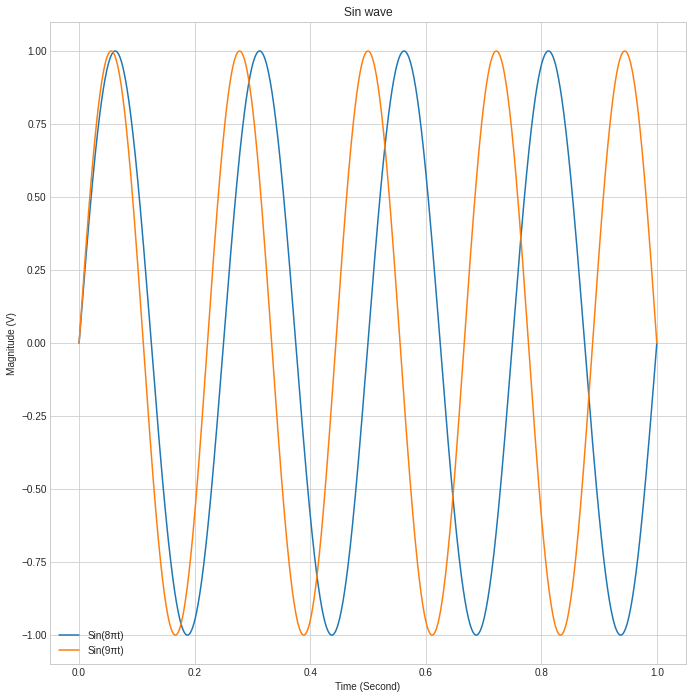

In [2]:
from numpy.fft import fft

fs = 1000
t = np.linspace(0,1,fs)
f_1 = 4
f_2 = 4.5
s_1 = np.sin(2*np.pi*f_1*t)
s_2 = np.sin(2*np.pi*f_2*t)
fig, ax = createSubplot(1)
ax.plot(t,s_1,label='Sin(8πt)')
ax.plot(t,s_2,label='Sin(9πt)')
ax.legend()
ax.set_title('Sin wave')
ax.set_xlabel('Time (Second)')
ax.set_ylabel('Magnitude (V)')
plt.show()

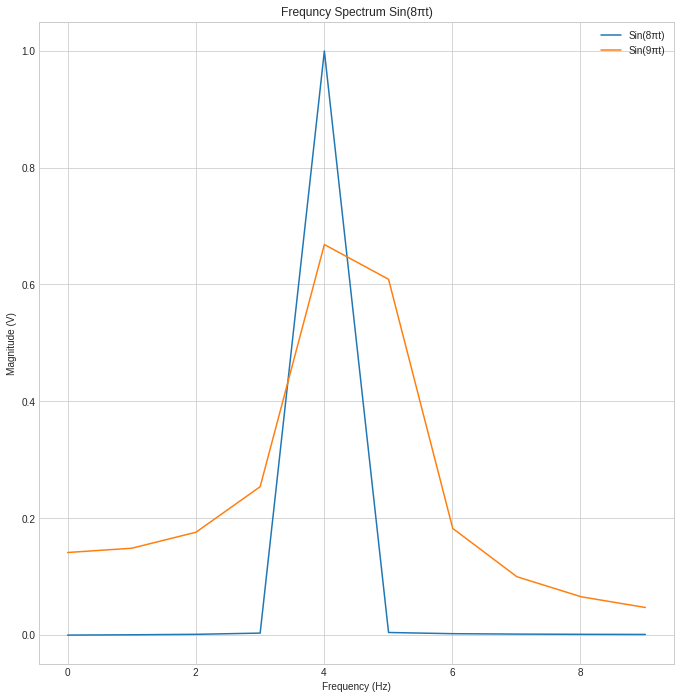

In [3]:
fig,ax = createSubplot(1)
m1,f1 = calFFT(s_1,fs)
ax.plot(f1[:10],m1[:10],label='Sin(8πt)')
m2,f2 = calFFT(s_2,fs)
ax.plot(f2[:10],m2[:10],label='Sin(9πt)')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude (V)')
ax.set_title('Frequncy Spectrum Sin(8πt)')
ax.legend()
plt.show()

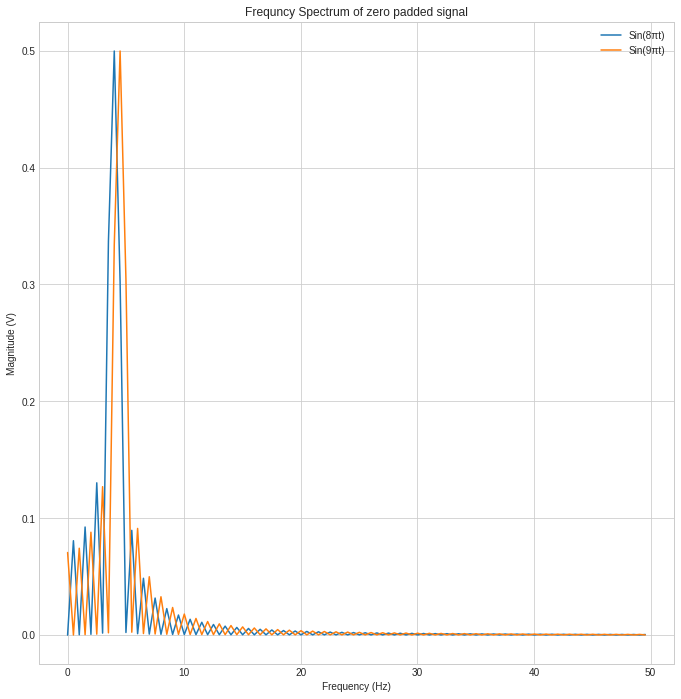

In [4]:
# Zero padding
s_1_padded = np.concatenate([s_1,np.zeros(1000)])
# print(s_1_padded.shape)
s_2_padded = np.concatenate([s_2,np.zeros(1000)])
# print(s_2_padded.shape)


fig,ax = createSubplot(1)

m1,f1 = calFFT(s_1_padded,fs)
ax.plot(f1[:100],m1[:100],label='Sin(8πt)')
m2,f2 = calFFT(s_2_padded,fs)
ax.plot(f2[:100],m2[:100],label='Sin(9πt)')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude (V)')
ax.set_title('Frequncy Spectrum of zero padded signal')
ax.legend()
plt.show()

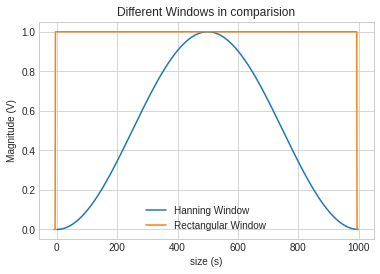

In [5]:
# hanning Window
size = s_1.shape[0]
hann = signal.hann(size)
plt.plot(np.arange(size),hann,label='Hanning Window')
# Rectangular Window
rect = signal.boxcar(size)
plt.plot(np.arange(-10,size),np.concatenate([np.zeros(5),rect,np.zeros(5)] ),label='Rectangular Window')
plt.xlabel('size (s)')
plt.ylabel('Magnitude (V)')
plt.title('Different Windows in comparision')
plt.legend()
plt.show()

Window choose be applied before the padding
- Multiply in time domain = convolute in freq domain

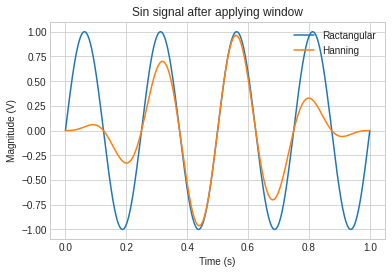

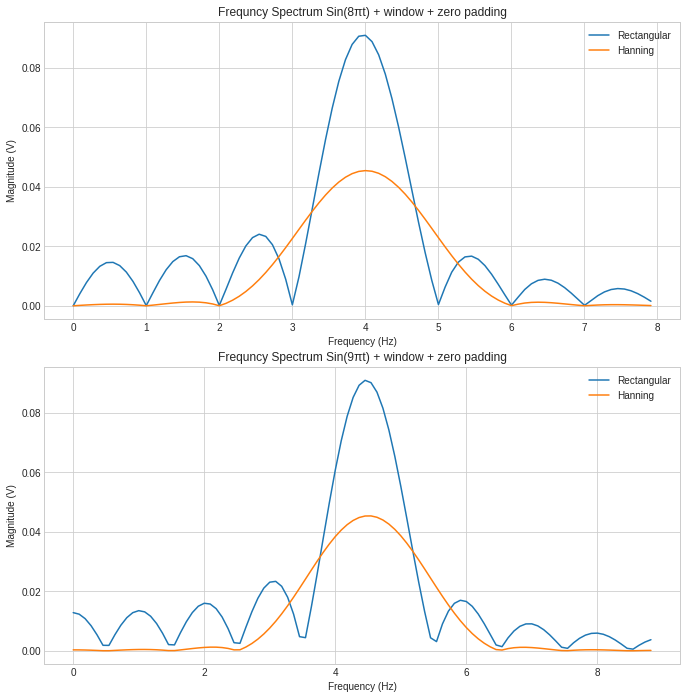

In [6]:
# apply Retangular window
def applyWindow(s,windowType):
    size = s.shape[0]
    window = None
    if(windowType == 'rectangular'):
        window = signal.boxcar(size)
    elif(windowType == 'hanning'):
        window = signal.hann(size)
    
    return s * window


s_1_r = applyWindow(s_1,'rectangular')
s_1_h = applyWindow(s_1,'hanning')
plt.plot(t,s_1_r,label='Ractangular')
plt.plot(t,s_1_h,label='Hanning')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude (V)')
plt.title('Sin signal after applying window')
plt.legend()
plt.show()

fig,ax = createSubplot(2)

s_1_r_pad = np.concatenate([s_1_r,np.zeros(10000)])
s_1_h_pad = np.concatenate([s_1_h,np.zeros(10000)])

m1,f1 = calFFT(s_1_r_pad,fs)
h = np.argmax(m1)
ax[0].plot(f1[:2*h],m1[:2*h],label='Rectangular')
m2,f2 = calFFT(s_1_h_pad,fs)
ax[0].plot(f2[:2*h],m2[:2*h],label='Hanning')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title('Frequncy Spectrum Sin(8πt) + window + zero padding')
ax[0].legend()


s_2_r = applyWindow(s_2,'rectangular')
s_2_h = applyWindow(s_2,'hanning')

s_2_r_pad = np.concatenate([s_2_r,np.zeros(10000)])
s_2_h_pad = np.concatenate([s_2_h,np.zeros(10000)])

m1,f1 = calFFT(s_2_r_pad,fs)
h = np.argmax(m1)
ax[1].plot(f1[:2*h],m1[:2*h],label='Rectangular')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude (V)')
ax[1].set_title('Frequncy Spectrum Sin(9πt) + window + zero padding')
m2,f2 = calFFT(s_2_h_pad,fs)
ax[1].plot(f2[:2*h],m2[:2*h],label='Hanning')
ax[1].legend()
plt.show()

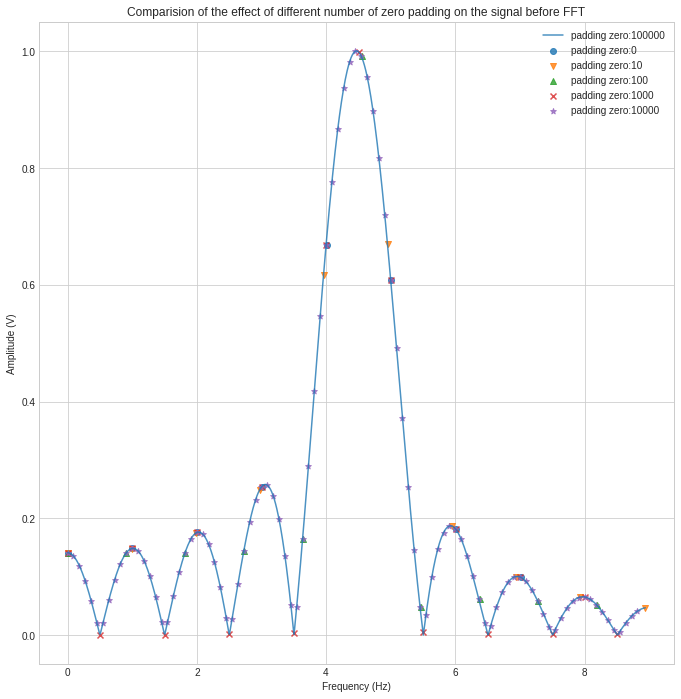

In [7]:
# Verify that less number of padding is a subset of bigger number of padding
# Let's use rectangular window with 4.5Hz of sin wave
fs = 1000
size = s_2.shape[0]
s_2_r = applyWindow(s_2,'rectangular')
pads = [0,1e+1,1e+2,1e+3,1e+4]
styles = ['o','v','^','x','*']
fig, ax = createSubplot(1)
for i,(pad_size,style) in enumerate(zip(pads,styles)):
    s_2_r_pad = np.concatenate([s_2_r,np.zeros(int(pad_size))])
    m,f = calFFT(s_2_r_pad,fs)
    m = m * ((size + pad_size) / size)
    h = np.argmax(m)
    ax.scatter(f[:2*h],m[:2*h],marker=style,alpha=0.8,label=f"padding zero:{int(pad_size)}")
    # plt.scatter(f[:2*h],m[:2*h])
s_2_r_pad = np.concatenate([s_2_r,np.zeros(int(1e+5))])
m,f = calFFT(s_2_r_pad,fs)
m = m * ((size + 1e+5) / size)
h = np.argmax(m)
ax.plot(f[:2*h],m[:2*h],alpha=0.8,label=f"padding zero:{int(1e+5)}")


ax.set_title('Comparision of the effect of different number of zero padding on the signal before FFT')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (V)')
ax.legend()
plt.show()

# Properties of the Fourier Transform
- Time shifting: v(t − t0) = V(f)e^−j2πft0
- Time scaling: v(at) = 1/|a|(V(f/a))
- Duality: V(t) ↔ v(−f)
- Modulation: v(t) cos(2πfct) ↔ 1/2 V(f − fc) + 1/2 V(f + fc)


In [8]:
fs = 1000
t = np.linspace(0,1,fs)
f = 4
s = np.sin(2*np.pi*f*t)

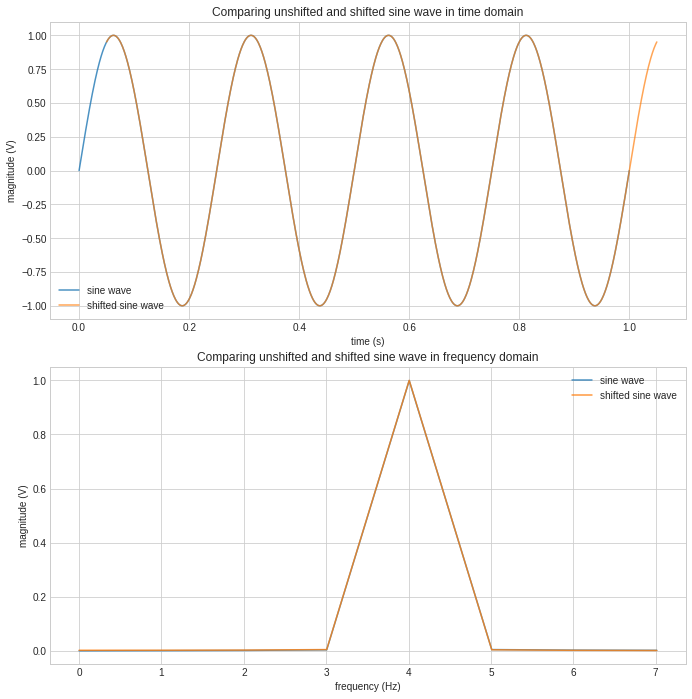

In [12]:
# 1. Time Shifting
t0 = 0.05
t_shifted = t + t0
s_shifted = np.sin(2*np.pi*f*t_shifted)

fig, ax = createSubplot(2)
ax[0].plot(t,s,alpha=0.8,label='sine wave')
ax[0].plot(t_shifted,s_shifted,alpha=0.7,label='shifted sine wave')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('magnitude (V)')
ax[0].set_title('Comparing unshifted and shifted sine wave in time domain')
ax[0].legend()

o_m,o_f = calFFT(s,fs)
o_h = np.argmax(o_m)
ax[1].plot(o_f[:2*o_h],o_m[:2*o_h],alpha=0.8,label=f"sine wave")

shifted_m,shifted_f = calFFT(s_shifted,fs)
shifted_h = np.argmax(shifted_m)
ax[1].plot(shifted_f[:2*shifted_h],shifted_m[:2*shifted_h],alpha=0.8,label=f"shifted sine wave")

# # print(np.exp(-1j * 2 * np.pi * f * t0 ))
# p_m = o_m * np.exp(-1j * 2 * np.pi * f * t0 )
# ax[1].plot(o_f[:2*o_h],p_m[:2*o_h],alpha=0.8,label=f"sine wave")

ax[1].set_xlabel('frequency (Hz)')
ax[1].set_ylabel('magnitude (V)')
ax[1].set_title('Comparing unshifted and shifted sine wave in frequency domain')
ax[1].legend()
plt.show()

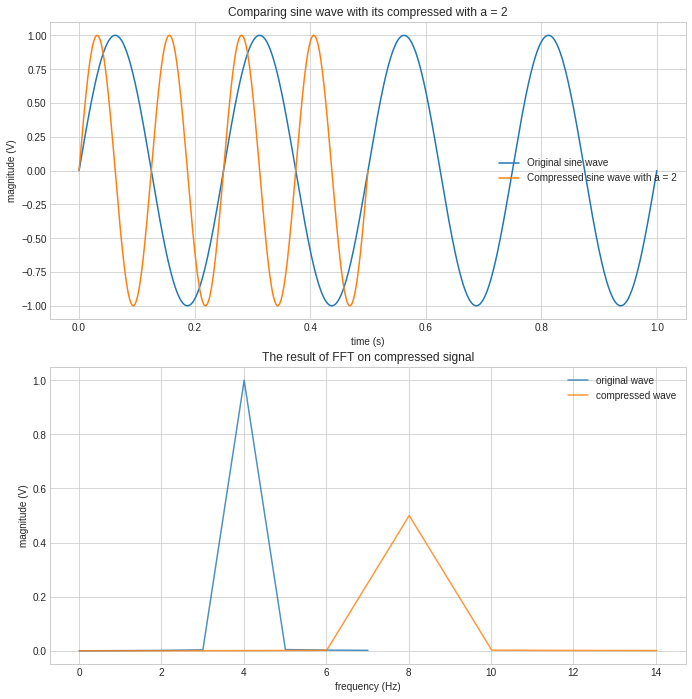

In [10]:
# 2. Time scaling: v(at) = 1/|a|(V(f/a))
a = 2 # compress
c_t = np.linspace(0,1,fs)
c_t = c_t/a
# c_s = np.sin(2 * np.pi * f * c_t)
# c_s = np.concatenate([c_s,np.zeros(len(s) - len(c_s)) ])

fig, ax = createSubplot(2)
ax[0].plot(t,s,label='Original sine wave')
ax[0].plot(c_t,s,label=f"Compressed sine wave with a = {a}")
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('magnitude (V)')
ax[0].set_title(f"Comparing sine wave with its compressed with a = {a}")
ax[0].legend()


o_m,o_f = calFFT(s,fs)
o_h = np.argmax(o_m)
ax[1].plot(o_f[:2*o_h],o_m[:2*o_h],alpha=0.8,label=f"original wave")

c_m,c_f = calFFT(s,fs)
c_h = np.argmax(c_m)
ax[1].plot(c_f[:2*c_h]*a,c_m[:2*c_h]/a,alpha=0.8,label=f"compressed wave")
ax[1].set_xlabel("frequency (Hz)")
ax[1].set_ylabel("magnitude (V)")
ax[1].set_title("The result of FFT on compressed signal")
ax[1].legend()
plt.show()

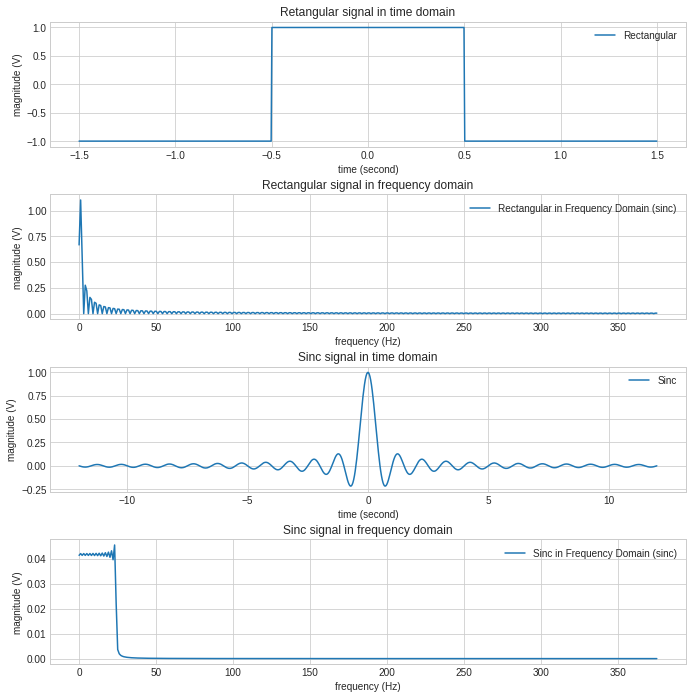

In [87]:
# 3. Duality: V(t) ↔ v(−f)
fs = 750
f = 0.5
t = np.linspace(-1.5,1.5-(1/fs),fs)
rect = signal.square(2 * np.pi * f * (t+0.5))
fig,ax = createSubplot(4)
ax[0].plot(t,rect,label='Rectangular')
ax[0].set_xlabel('time (second)')
ax[0].set_ylabel('magnitude (V)')
ax[0].set_title('Retangular signal in time domain')
ax[0].legend()

o_m,o_f = calFFT(rect,fs)
o_h = np.argmax(o_m)
ax[1].plot(o_f,o_m,label=f"Rectangular in Frequency Domain (sinc)")
ax[1].set_xlabel('frequency (Hz)')
ax[1].set_ylabel('magnitude (V)')
ax[1].set_title('Rectangular signal in frequency domain')
ax[1].legend()

t = np.linspace(-12,12,fs)
sinc = np.sinc(2*t)
# print(sinc)
ax[2].plot(t,sinc,label='Sinc')
ax[2].set_xlabel('time (second)')
ax[2].set_ylabel('magnitude (V)')
ax[2].set_title('Sinc signal in time domain')
ax[2].legend()

o_m,o_f = calFFT(sinc,fs)
o_h = np.argmax(o_m)
ax[3].plot(o_f,o_m,label=f"Sinc in Frequency Domain (sinc)")
ax[3].set_xlabel('frequency (Hz)')
ax[3].set_ylabel('magnitude (V)')
ax[3].set_title('Sinc signal in frequency domain')
ax[3].legend()


plt.show()

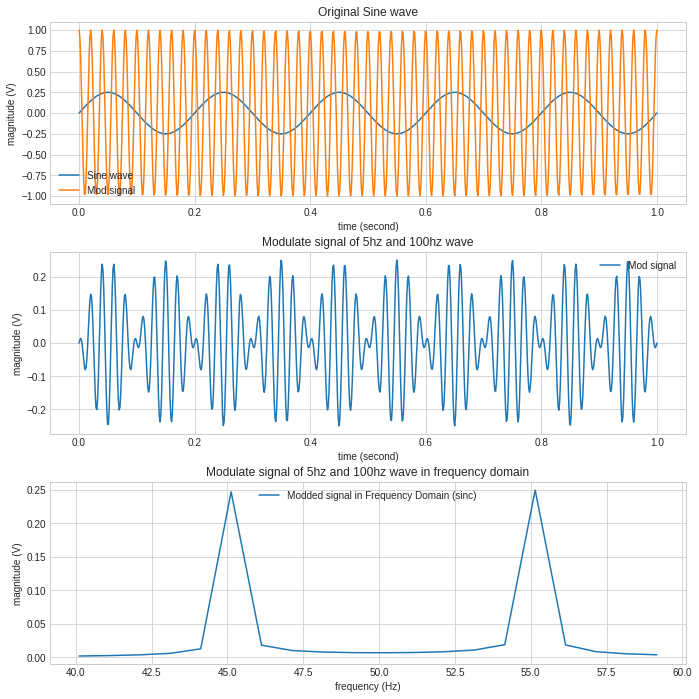

In [105]:
# 4. Modulation: v(t) cos(2πfct) ↔ 1/2 V(f − fc) + 1/2 V(f + fc)
fig,ax = createSubplot(3)


fs = 750
f = 5
t = np.linspace(0,1,fs)
s = np.sin(2 * np.pi * f * t)/4
ax[0].plot(t,s,label='Sine wave')
fc = 50
mod = np.exp(1j * 2 * np.pi * fc * t)
ax[0].plot(t,mod,label='Mod signal')

ax[0].set_xlabel('time (second)')
ax[0].set_ylabel('magnitude (V)')
ax[0].set_title('Original Sine wave')
ax[0].legend()

modded_signal = s * mod
ax[1].plot(t,modded_signal,label='Mod signal')
ax[1].set_xlabel('time (second)')
ax[1].set_ylabel('magnitude (V)')
ax[1].set_title('Modulate signal of 5hz and 100hz wave')
ax[1].legend()


o_m,o_f = calFFT(modded_signal,fs)
o_h = np.argmax(o_m)
ax[2].plot(o_f[40:60],o_m[40:60],label=f"Modded signal in Frequency Domain (sinc)")
ax[2].set_xlabel('frequency (Hz)')
ax[2].set_ylabel('magnitude (V)')
ax[2].set_title('Modulate signal of 5hz and 100hz wave in frequency domain')
ax[2].legend()


# Convolution Operations
- Commutative: s1 \* s2 = s2 \* s1
- Distributivity: s1 * (s2 + s3) = (s1 * s2) + (s1 * s3)
- Associativity: s1 * (s2 * s3) = (s1 * s2) * s3)


In [111]:
# 1. Commutative: s1 * s2 = s2 * s1
# numpy.convolve(a, v, mode='full')
fs = 750
f = 0.5
t = np.linspace(-1.5,1.5-(1/fs),fs)
rect1 = signal.square(2 * np.pi * f * (t+0.5))
rect2 = signal.square(2 * np.pi * f * (t+0.5))

(np.convolve(rect1,rect2) == np.convolve(rect2,rect1)).all()

True

In [112]:
# 2. Distributivity: s1 (s2 + s3) = (s1 s2) + (s1 * s3)

rect1 = signal.square(2 * np.pi * f * (t+0.5))
rect2 = signal.square(2 * np.pi * f * (t+0.5))
rect3 = signal.square(2 * np.pi * f * (t+0.5))

(np.convolve(rect1,rect2 + rect3) == np.convolve(rect1,rect2) + np.convolve(rect1,rect3)).all()

True

In [114]:
# 3. Associativity: s1 (s2 s3) = (s1 s2) s3)

rect1 = signal.square(2 * np.pi * f * (t+0.5))
rect2 = signal.square(2 * np.pi * f * (t+0.5))
rect3 = signal.square(2 * np.pi * f * (t+0.5))

(np.convolve(rect1,np.convolve(rect2,rect3)) == np.convolve(np.convolve(rect1,rect2),rect3)).all()

True